In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib inline')
sns.set(style='white', font_scale=0.9)

#XGBoost imports
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection , metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

ModuleNotFoundError: No module named 'xgboost'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib inline')
sns.set(style='white', font_scale=0.9)

#XGBoost imports
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection , metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib inline')
sns.set(style='white', font_scale=0.9)

#XGBoost imports
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection , metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train.head()


NameError: name 'df_train' is not defined

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#We will also create a total dataset for dealing with missing values
df_total = df_train.append(df_test)

In [4]:
df_train.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [5]:
df_train['Title'] = df_train['Name'].str.split(".").str[0]
df_train['Title'] = df_train['Title'].str.split(" ").str[-1]

df_test['Title'] = df_test['Name'].str.split(".").str[0]
df_test['Title'] = df_test['Title'].str.split(" ").str[-1]

#Drop name from the dataset
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [6]:
df_train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Countess      1
Sir           1
Lady          1
Capt          1
Don           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [7]:
def updateTitle(s):
    if s in ['Mlle', 'Ms', 'Mme']:
        return 'Miss'
    elif s in ['Mr', 'Miss', 'Mrs', 'Master']:
        return s
    else:
        return 'Other'

df_train['Title'] = df_train['Title'].apply(lambda x: updateTitle(x))

df_test['Title'] = df_test['Title'].apply(lambda x: updateTitle(x))


In [8]:
df_train.groupby('Title')['Survived'].mean()


Title
Master    0.575000
Miss      0.704301
Mr        0.156673
Mrs       0.792000
Other     0.347826
Name: Survived, dtype: float64

In [9]:
df_train['Age'] = df_train['Age'].fillna(df_total['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_total['Age'].mean())

In [10]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] 

df_train.drop('SibSp', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)

df_train.drop('Parch', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

In [11]:
df_train['FamilySize'] = df_train['FamilySize'].apply(lambda x: 4 if x > 4 else x)
df_test['FamilySize'] = df_test['FamilySize'].apply(lambda x: 4 if x > 4 else x

SyntaxError: unexpected EOF while parsing (<ipython-input-11-eb62b2c35ff7>, line 2)

In [12]:
df_train['FamilySize'] = df_train['FamilySize'].apply(lambda x: 4 if x > 4 else x)
df_test['FamilySize'] = df_test['FamilySize'].apply(lambda x: 4 if x > 4 else x)


In [13]:
df_train.groupby('FamilySize')['Survived'].mean()


FamilySize
0    0.303538
1    0.552795
2    0.578431
3    0.724138
4    0.161290
Name: Survived, dtype: float64

In [14]:
df_train['Ticket'] = df_train['Ticket'].str[0:1]
df_test['Ticket'] = df_train['Ticket'].str[0:1]

In [15]:
df_train['Fare'] = df_train['Fare'].fillna(df_total['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_total['Fare'].mean())

In [16]:
df_train['Cabin'] = df_train['Cabin'].str[0]
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')

df_test['Cabin'] = df_test['Cabin'].str[0]
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')

In [17]:
df_train['Embarked'] = df_train['Embarked'].fillna('Unknown')
df_test['Embarked'] = df_test['Embarked'].fillna('Unknown')

In [18]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [19]:
df_train_comb = df_train
df_train_comb['TrainTest'] = 'Train'
df_test_comb = df_test
df_test_comb['TrainTest'] = 'Test'

df_total = df_train_comb.append(df_test_comb)

In [20]:
df_total = pd.get_dummies(df_total, drop_first=True)


In [21]:
X_train = df_total[df_total['TrainTest_Train'] == 1].drop(['Survived', 'PassengerId'], axis=1)
y_train = df_total[df_total['TrainTest_Train'] == 1]['Survived']

X_test = df_total[df_total['TrainTest_Train'] == 0].drop(['Survived', 'PassengerId'], axis=1)


In [22]:
param_grid1 = {'max_depth':range(3,10,1),
               'min_child_weight':range(1,6,1)}

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=140, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)

grid1 = GridSearchCV(estimator=model, param_grid=param_grid1, scoring='roc_auc', n_jobs=-1, verbose=1)
grid1.fit(X_train, y_train)

print(grid1.best_score_)
print(grid1.best_params_)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  98 out of 105 | elapsed:    4.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    4.5s finished


0.880620266513
{'max_depth': 8, 'min_child_weight': 5}


In [23]:
param_grid2 = {'gamma':[i/10.0 for i in range(0,7)]}

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=140, 
                      max_depth=4,
                      min_child_weight=5, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)

grid2 = GridSearchCV(estimator=model, param_grid=param_grid2, scoring='roc_auc', n_jobs=-1, verbose=1)
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.7s finished


0.879909244879
{'gamma': 0.0}


In [24]:
param_grid3 = {'subsample':[i/100.0 for i in range(60,100,5)],
               'colsample_bytree':[i/100.0 for i in range(60,100,5)]}

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=140, 
                      max_depth=4,
                      min_child_weight=5, 
                      gamma=0.0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)

grid3 = GridSearchCV(estimator=model, param_grid=param_grid3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid3.fit(X_train, y_train)

print(grid3.best_score_)
print(grid3.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s


0.881634870418
{'colsample_bytree': 0.75, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    6.3s finished


In [25]:
param_grid4 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=140, 
                      max_depth=4,
                      min_child_weight=5, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.95,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)

grid4 = GridSearchCV(estimator=model, param_grid=param_grid4, scoring='roc_auc', n_jobs=-1, verbose=1)
grid4.fit(X_train, y_train)

print(grid4.best_score_)
print(grid4.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished


0.881331288148
{'reg_alpha': 1}


In [26]:
classifier = XGBClassifier(learning_rate =0.01, 
                      n_estimators=5000, 
                      max_depth=4,
                      min_child_weight=5, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.95,
                      reg_alpha=1e-05,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.95,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=5, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=29, silent=True, subsample=0.8)

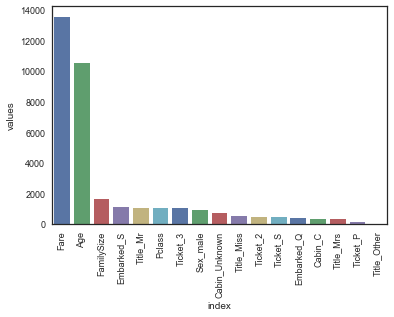

In [27]:
feature_import = pd.DataFrame.from_dict(classifier.booster().get_fscore(), orient='index')
feature_import.columns = ['values']
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
plt.xticks(rotation=90)
plt.show()

In [28]:
test_pred = classifier.predict(X_test)


In [29]:
test_pred.csv= classifier.predict(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'csv'

In [30]:
test_pred


array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [31]:

submit['Survived'] = test_pred
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

NameError: name 'submit' is not defined

In [32]:
submit = pd.read_csv('gender_submission.csv')

In [33]:
submit['Survived'] = test_pred
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = dataTrain[0::, 1::]
y = dataTrain[0::, 0]

acc_dict = {}
x0 = [1 / len(classifiers)]*len(classifiers)


for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_ = [] # array of predictions from the classifiers

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        y_.append(train_predictions) # prediction of current classifier appended
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

    # Computing mixed model
    res = minimize(mix, x0, bounds=[(0, 1)] * len(classifiers))
    weights = res.x
    acc = -res.fun # best accuracy reached through mixing
    if 'mix' in acc_dict:
        acc_dict['mix'] += acc
    else:
        acc_dict['mix'] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.show()

NameError: name 'dataTrain' is not defined